In [6]:
import pickle

# Open the pickle file in binary mode
with open('negative_sent_articles.pkl', 'rb') as file:
    # Load the object from the pickle file
    df_n = pickle.load(file)

df = df_n

## Labels with Positive Topics Summ

In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import string
import pickle

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

# import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [3]:
## Filter using LDA topics
ldamodel = LdaModel.load('ldamodel_neg')
with open('dictionary_neg.pkl', 'rb') as f:
    dictionary = pickle.load(f)
with open('corpus_neg.pkl', 'rb') as f:
    corpus = pickle.load(f)

In [4]:
#topic_distributions = [ldamodel.get_document_topics(doc) for doc in corpus]
#
## Choose the topic with the highest probability for each document
#labels = [max(td, key=lambda x: x[1])[0] for td in topic_distributions]
#
## Assign the labels to the corresponding rows in your dataset
#df['topic_label'] = labels

In [7]:
import tqdm

# Initialize an empty list to store the topic distributions
topic_distributions = []

# Loop through the corpus and get the document topics
with tqdm.tqdm(total=len(corpus), desc='Calculating topic distributions') as pbar:
    for doc in corpus:
        topic_dist = ldamodel.get_document_topics(doc)
        topic_distributions.append(topic_dist)
        pbar.update(1)

# Choose the topic with the highest probability for each document
labels = [max(td, key=lambda x: x[1])[0] for td in topic_distributions]

# Assign the labels to the corresponding rows in your dataset
df['topic_label'] = labels

Calculating topic distributions: 100%|██████████| 70401/70401 [01:32<00:00, 761.54it/s] 


In [14]:
with open('labels_lda_neg.pkl', 'wb') as f:
    pickle.dump(labels, f)

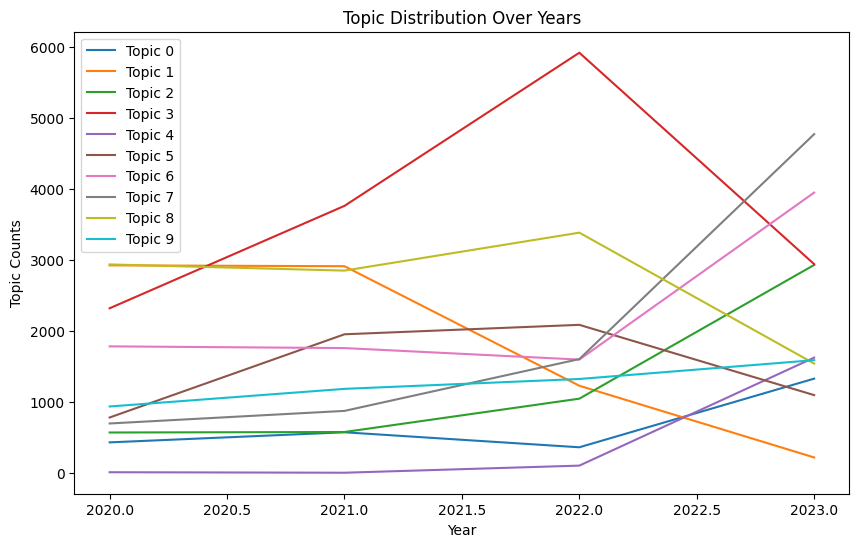

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'df' DataFrame with 'date' and 'topic_label' columns

# Extract the year from the 'date' column
df['date'] = pd.to_datetime(df['year_month'])
df['year'] = df['date'].dt.year

# Count the occurrences of each topic label for each year
topic_counts = df.groupby(['year', 'topic_label']).size().reset_index(name='count')

# Plot the line plot
plt.figure(figsize=(10, 6))
for topic in topic_counts['topic_label'].unique():
    topic_data = topic_counts[topic_counts['topic_label'] == topic]
    plt.plot(topic_data['year'], topic_data['count'], label=f"Topic {topic}")
plt.xlabel('Year')
plt.ylabel('Topic Counts')
plt.title('Topic Distribution Over Years')
plt.legend()
plt.show()

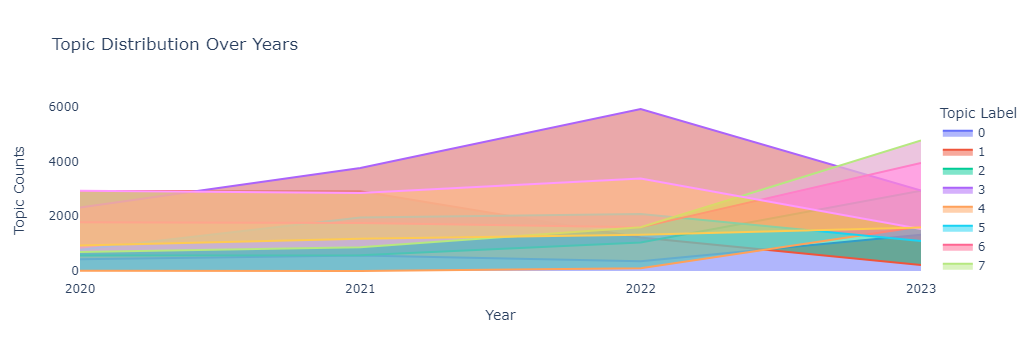

In [16]:
import pandas as pd
import plotly.express as px

# Assuming you already have the 'df' DataFrame with 'date' and 'topic_label' columns

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count the occurrences of each topic label for each year
topic_counts = df.groupby(['year', 'topic_label']).size().reset_index(name='count')

# Create an interactive line plot using Plotly
fig = px.line(topic_counts, x='year', y='count', color='topic_label', line_group='topic_label', 
              labels={'year': 'Year', 'count': 'Topic Counts'}, title='Topic Distribution Over Years')

# Add filled area under the lines
fig.update_traces(fill='tonexty')

fig.update_layout(
    hovermode='x',  # Show hover information for x-axis
    xaxis=dict(type='category'),  # Use categorical x-axis
    legend_title='Topic Label',
    showlegend=True,
    plot_bgcolor='white'  # Set plot background color
)

fig.show()

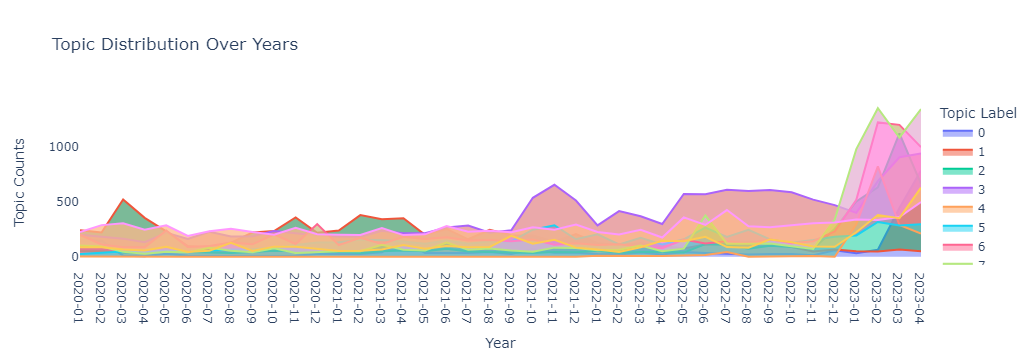

In [18]:
import pandas as pd
import plotly.express as px

# Assuming you already have the 'df' DataFrame with 'date' and 'topic_label' columns

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count the occurrences of each topic label for each year
topic_counts = df.groupby(['year_month', 'topic_label']).size().reset_index(name='count')

# Create an interactive line plot using Plotly
fig = px.line(topic_counts, x='year_month', y='count', color='topic_label', line_group='topic_label', 
              labels={'year_month': 'Year', 'count': 'Topic Counts'}, title='Topic Distribution Over Years')

# Add filled area under the lines
fig.update_traces(fill='tonexty')

fig.update_layout(
    hovermode='x',  # Show hover information for x-axis
    xaxis=dict(type='category'),  # Use categorical x-axis
    legend_title='Topic Label',
    showlegend=True,
    plot_bgcolor='white'  # Set plot background color
)

fig.show()

## Summaries:


Here are summaries of the topics:

Topic 0: This topic includes keywords like news, email, AI, machine learning, account, and password. It seems to be related to news and information security, possibly involving AI and machine learning technologies.

Topic 1: This topic contains keywords like AI, news, artificial intelligence, technology, and people. It appears to be a general topic discussing the current advancements and impact of AI and artificial intelligence technologies.

Topic 2: This topic revolves around keywords like image, AI, content, technology, and deepfake. It likely focuses on the use of AI in image and content manipulation, particularly discussing topics like deepfake technology and its implications.

Topic 3: This topic includes keywords like AI, data, customer, business, and platform. It appears to be related to the use of AI in businesses, particularly in the context of customer data, platforms, and solutions.

Topic 4: This topic revolves around keywords like market, intelligence, artificial, AI, and industry. It seems to be discussing the global market and industry trends related to artificial intelligence, including market reports, research, and the growth of AI technologies.

Topic 5: This topic includes keywords like ChatGPT, AI, Google, search, and chatbot. It appears to be discussing AI technologies used in search engines, particularly focusing on ChatGPT, Google, and Microsoft, as well as the impact of AI on user interactions and news.

Topic 6: This topic revolves around keywords like AI, model, system, data, and human. It likely discusses AI models and systems, their capabilities, the role of human interaction, and the impact of AI technology on various domains.

Topic 7: This topic includes keywords like AI, company, stock, share, and market. It appears to be discussing AI companies, their stock performance, market trends, and investment opportunities in the AI sector.

Topic 8: This topic revolves around keywords like health, data, patient, medical, and AI. It likely focuses on the use of AI in healthcare, including topics such as patient data, medical applications, and the potential benefits of AI in the field.

Topic 9: This topic includes keywords like AI, ChatGPT, student, intelligence, and human. It appears to discuss the use of AI, particularly ChatGPT, in educational settings and its impact on students and human intelligence. It may also touch on the broader societal implications of AI technology.